In [2]:
import numpy as np
import networkx as nx
import partition
import partitioner
import search
import utils_lite
import generalized_graph
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statistics import median

In [3]:
G = nx.read_adjlist(
    path = '/home/cruder/PycharmProjects/SNACS/Datasets/CA-HepTh.txt',
    comments="#",
    delimiter=None,
    create_using=None,
    nodetype=None,
)

In [4]:
easy_enron_G = nx.read_adjlist(
    path = '/home/cruder/PycharmProjects/SNACS/Datasets/email-enron-only.mtx',
    comments="#",
    delimiter=None,
    create_using=None,
    nodetype=None,
)

In [5]:
flights_G = nx.read_adjlist(
    path = '/home/cruder/PycharmProjects/SNACS/Datasets/inf-USAir97.mtx',
    comments="#",
    delimiter=None,
    create_using=None,
    nodetype=None,
)

In [6]:
netscience_G = nx.read_adjlist(
    path = '/home/cruder/PycharmProjects/SNACS/Datasets/ca-netscience.mtx',
    comments="#",
    delimiter=None,
    create_using=None,
    nodetype=None,
)

In [7]:
wikivote_G = nx.read_adjlist(
    path = '/home/cruder/PycharmProjects/SNACS/Datasets/soc-wiki-Vote.mtx',
    comments="#",
    delimiter=None,
    create_using=None,
    nodetype=None,
)

In [8]:
fb_messages_G = nx.read_adjlist(
    path = '/home/cruder/PycharmProjects/SNACS/Datasets/ia-fb-messages.mtx',
    comments="#",
    delimiter=None,
    create_using=None,
    nodetype=None,
)

In [9]:
# Initialized graph names
graph_names = ['Enron', 'Flights', 'Netscience', 'Wikivote', 'Facebook']

In [10]:
# Iterable graph list
graphs =[easy_enron_G,
         flights_G,
         netscience_G,
         wikivote_G,
         fb_messages_G]

In [134]:
# Create the main DataFrame that will contain all the information
df = pd.DataFrame(columns = ['nodes', 'edges', 'components', 'avg_cc' ,'avg_short_path_length','diameter','closeness', 'betweenness', 'max_degree'])

In [13]:
# Load previous data
df = pd.read_csv('Final Results', index_col=0)

In [14]:
df.sort_values("graphnames")

,graphnames,nodes,edges,components,avg_cc,diameter,closeness,betweenness,max_degree,avg_shortest_path_length
15,Enron,143.0,623.0,1.00,0.433907,8.00,0.350617,0.003749,42.00,2.967005
0,Enron10,143.0,623.0,2.63,0.234611,6.93,0.359586,0.008125,24.16,2.836307
5,Enron2,143.0,623.0,2.22,0.354003,8.10,0.350153,0.005717,30.15,2.914170
10,Enron5,143.0,623.0,3.26,0.301744,6.69,0.355378,0.005457,27.81,2.816106
19,Facebook,1266.0,6451.0,1.00,0.068350,9.00,0.308537,0.000238,112.00,3.310309
4,Facebook10,1266.0,6451.0,70.50,0.038317,7.64,0.297637,0.000218,98.56,3.024108
9,Facebook2,1266.0,6451.0,83.50,0.049117,7.38,0.296559,0.000183,113.67,2.952121
14,Facebook5,1266.0,6451.0,66.39,0.041683,8.01,0.299084,0.000195,103.77,3.023562
16,Flights,332.0,2126.0,1.00,0.625217,6.00,0.364137,0.000010,139.00,2.738125
1,Flights10,332.0,2126.0,19.67,0.389842,6.88,0.353158,0.000226,103.07,2.530999


In [295]:
df.to_csv("Final Results")

In [38]:
def get_mask(df, dataset="Enron"):
    mask = []
    k = []
    for i in df["graphnames"]:
        mask.append(dataset in i)
        if dataset in i:
            try:
                k.append(int(i.strip(dataset)))
            except:
                k.append(0)
    
    new_df = df[mask]
    new_df["k"] = k
        
    return new_df

In [39]:
def get_mask_pert(df, dataset="Enron"):
    mask = []
    p = []
    for i in df["graphnames"]:
        mask.append(dataset in i)
        if dataset in i:
            try:
                p.append(float(i.strip(dataset)))
            except:
                p.append(0)
    
    new_df = df[mask]
    new_df["p"] = p
        
    return new_df

In [40]:
# Original graphs measurements
def og_measurements(dataframe, graphs):
    for index, graph in enumerate(graphs):
        og_measurements = get_measurements(graph)
        og_measurements = og_measurements.rename((str(graph_names[index])))
        dataframe = dataframe.append(og_measurements)
    return dataframe

In [41]:
# Parameters for GraphGen
# Group sizes k
group_sizes = [2,5,10]
# Temp directory
tmp_dir = "/tmp"

In [42]:
def mainloop_graphgen(dataframe):
    df = dataframe
    for k in group_sizes:
        for index, graph in enumerate(graphs):
            current_partitioner = cust_part(graph, k, tmp_dir, 1000)
            current_generalized_graph = generalize(graph, current_partitioner, k)
            curr_measurements = sample100(current_generalized_graph)
            curr_measurements = curr_measurements.rename((str(graph_names[index]))+str(k))
            df = df.append(curr_measurements)
    return df

In [141]:
# RUN THE MAIN LOOP!
df = mainloop_graphgen(df) 

checkpoint: saving state to filename=/tmp/.2.i.0.partition
checkpoint: saving best (with score=-2342.26) to filename=/tmp/.2.b.partition
steps=0 n=143 k=2 avg_size=143 uphill=0 downhill=0 stationery=0 noops=0 splits=0 merges=0 mergesplits=0 flips=0 cache=0 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2342.26
steps=10 n=143 k=2 avg_size=13 uphill=1 downhill=0 stationery=0 noops=0 splits=10 merges=0 mergesplits=0 flips=0 cache=0.45 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2059.34
steps=20 n=143 k=2 avg_size=8.41 uphill=0.8 downhill=0 stationery=0.2 noops=2 splits=6 merges=0 mergesplits=2 flips=0 cache=0.607692 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1816.34
steps=30 n=143 k=2 avg_size=5.5 uphill=0.9 downhill=0 stationery=0.1 noops=1 splits=9 merges=0 mergesplits=0 flips=0 cache=0.669975 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1583.4
steps=40 n=143 k=2 avg_size=4.61 uphill=0.7 downhill=0 stationery=0.3 noops=3 splits=5 merges=0 mergesplits=2 flips=0 cache=0.744059 nb

steps=410 n=143 k=2 avg_size=2.01 uphill=0 downhill=0.2 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=1 flips=1 cache=0.991525 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-655.818
steps=420 n=143 k=2 avg_size=2.01 uphill=0.1 downhill=0 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=0 flips=1 cache=0.988806 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-654.249
steps=430 n=143 k=2 avg_size=2.01 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.985447 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-654.249
steps=440 n=143 k=2 avg_size=2.01 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.986287 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-654.249
steps=450 n=143 k=2 avg_size=2.01 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-654.249
steps=460 n=143 k=2 avg_size=2.01 uphill=0 downhill=0.1 stationer

steps=830 n=143 k=2 avg_size=2.01 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-640.569
steps=840 n=143 k=2 avg_size=2.01 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-640.569
steps=850 n=143 k=2 avg_size=2.01 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-640.569
steps=860 n=143 k=2 avg_size=2.01 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-640.569
steps=870 n=143 k=2 avg_size=2.01 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=0 flips=1 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-641.529
steps=880 n=143 k=2 avg_size=2.01 uphill=0.1 downhill=0 stationery=0.9 noops=9 splits=0 merges=0 merge

steps=110 n=332 k=2 avg_size=3.86 uphill=0.5 downhill=0.1 stationery=0.4 noops=4 splits=1 merges=0 mergesplits=4 flips=1 cache=0.907631 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2910.7
steps=120 n=332 k=2 avg_size=3.65 uphill=0.6 downhill=0.1 stationery=0.3 noops=3 splits=5 merges=0 mergesplits=2 flips=0 cache=0.858555 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2722.89
steps=130 n=332 k=2 avg_size=3.39 uphill=0.8 downhill=0 stationery=0.2 noops=2 splits=7 merges=0 mergesplits=1 flips=0 cache=0.867113 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2581.4
steps=140 n=332 k=2 avg_size=3.16 uphill=0.7 downhill=0 stationery=0.3 noops=3 splits=7 merges=0 mergesplits=0 flips=0 cache=0.914066 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2436.86
steps=150 n=332 k=2 avg_size=3.07 uphill=0.6 downhill=0.2 stationery=0.2 noops=2 splits=3 merges=0 mergesplits=3 flips=2 cache=0.889159 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2246.28
steps=160 n=332 k=2 avg_size=2.96 uphill=0.6 downhi

steps=520 n=332 k=2 avg_size=2.08 uphill=0 downhill=0.2 stationery=0.8 noops=8 splits=1 merges=0 mergesplits=1 flips=0 cache=0.995511 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1468.26
steps=530 n=332 k=2 avg_size=2.08 uphill=0.1 downhill=0 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.975832 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1463.08
steps=540 n=332 k=2 avg_size=2.08 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=0 flips=1 cache=0.99832 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1463.08
steps=550 n=332 k=2 avg_size=2.08 uphill=0.1 downhill=0.1 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=1 flips=1 cache=0.998273 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1462.56
steps=560 n=332 k=2 avg_size=2.08 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=0.997222 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1462.56
steps=570 n=332 k=2 avg_size=2.06 uphill=0.2 downhill=0 s

steps=940 n=332 k=2 avg_size=2.01 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=0 flips=1 cache=0.999368 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1427.37
steps=950 n=332 k=2 avg_size=2.01 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.996823 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1427.37
steps=960 n=332 k=2 avg_size=2.01 uphill=0.1 downhill=0 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.99595 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1423.92
steps=970 n=332 k=2 avg_size=2.01 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1423.92
steps=980 n=332 k=2 avg_size=2.01 uphill=0 downhill=0.2 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=2 flips=0 cache=0.997283 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1423.92
steps=990 n=332 k=2 avg_size=2.01 uphill=0 downhill=0 stationery=1

steps=50 n=379 k=2 avg_size=7.43 uphill=0.6 downhill=0.2 stationery=0.2 noops=2 splits=6 merges=0 mergesplits=1 flips=1 cache=0.813625 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-3614.85
steps=60 n=379 k=2 avg_size=6.77 uphill=0.5 downhill=0 stationery=0.5 noops=5 splits=5 merges=0 mergesplits=0 flips=0 cache=0.8228 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-3490.92
steps=70 n=379 k=2 avg_size=6.11 uphill=0.7 downhill=0.1 stationery=0.2 noops=2 splits=6 merges=0 mergesplits=1 flips=1 cache=0.853066 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-3349.04
steps=80 n=379 k=2 avg_size=5.41 uphill=0.9 downhill=0 stationery=0.1 noops=1 splits=8 merges=0 mergesplits=1 flips=0 cache=0.810056 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-3125.49
steps=90 n=379 k=2 avg_size=4.99 uphill=0.7 downhill=0 stationery=0.3 noops=3 splits=6 merges=0 mergesplits=1 flips=0 cache=0.842742 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-3001.11
checkpoint: saving state to filename=/tmp/.2.i.100.partiti

steps=460 n=379 k=2 avg_size=2.18 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=0.946875 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-901.606
steps=470 n=379 k=2 avg_size=2.18 uphill=0.1 downhill=0 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.971311 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-895.538
steps=480 n=379 k=2 avg_size=2.17 uphill=0.2 downhill=0 stationery=0.8 noops=8 splits=1 merges=0 mergesplits=1 flips=0 cache=0.983923 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-881.351
steps=490 n=379 k=2 avg_size=2.15 uphill=0.3 downhill=0 stationery=0.7 noops=7 splits=1 merges=0 mergesplits=2 flips=0 cache=0.956656 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-851.389
checkpoint: saving state to filename=/tmp/.2.i.500.partition
checkpoint: saving best (with score=-851.389) to filename=/tmp/.2.b.partition
steps=500 n=379 k=2 avg_size=2.15 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 

steps=870 n=379 k=2 avg_size=2.03 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=0.923077 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-654.332
steps=880 n=379 k=2 avg_size=2.03 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.962963 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-654.332
steps=890 n=379 k=2 avg_size=2.02 uphill=0.3 downhill=0 stationery=0.7 noops=7 splits=1 merges=0 mergesplits=1 flips=1 cache=0.980435 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-634.883
checkpoint: saving state to filename=/tmp/.2.i.900.partition
checkpoint: saving best (with score=-634.883) to filename=/tmp/.2.b.partition
steps=900 n=379 k=2 avg_size=2.02 uphill=0 downhill=0.6 stationery=0.4 noops=4 splits=0 merges=0 mergesplits=5 flips=1 cache=0.879032 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-635.677
steps=910 n=379 k=2 avg_size=2.02 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 

checkpoint: saving state to filename=/tmp/.2.i.0.partition
checkpoint: saving best (with score=-16973.9) to filename=/tmp/.2.b.partition
steps=0 n=889 k=2 avg_size=35.56 uphill=0 downhill=0 stationery=0 noops=0 splits=0 merges=0 mergesplits=0 flips=0 cache=0 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-16973.9
steps=10 n=889 k=2 avg_size=26.15 uphill=1 downhill=0 stationery=0 noops=0 splits=9 merges=0 mergesplits=1 flips=0 cache=0.567426 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-15718.7
steps=20 n=889 k=2 avg_size=20.2 uphill=1 downhill=0 stationery=0 noops=0 splits=10 merges=0 mergesplits=0 flips=0 cache=0.607895 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-15134.5
steps=30 n=889 k=2 avg_size=17.1 uphill=0.8 downhill=0 stationery=0.2 noops=2 splits=8 merges=0 mergesplits=0 flips=0 cache=0.709354 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-14760.1
steps=40 n=889 k=2 avg_size=14.34 uphill=1 downhill=0 stationery=0 noops=0 splits=10 merges=0 mergesplits=0 flips=0 cache=0.6651

steps=410 n=889 k=2 avg_size=3.17 uphill=0.7 downhill=0 stationery=0.3 noops=3 splits=5 merges=0 mergesplits=2 flips=0 cache=0.846373 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-7027.94
steps=420 n=889 k=2 avg_size=3.14 uphill=0.4 downhill=0.1 stationery=0.5 noops=5 splits=3 merges=0 mergesplits=1 flips=1 cache=0.884373 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-6949.92
steps=430 n=889 k=2 avg_size=3.1 uphill=0.5 downhill=0 stationery=0.5 noops=5 splits=4 merges=0 mergesplits=1 flips=0 cache=0.853719 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-6852.77
steps=440 n=889 k=2 avg_size=3.08 uphill=0.3 downhill=0.2 stationery=0.5 noops=5 splits=2 merges=0 mergesplits=1 flips=2 cache=0.91431 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-6806.15
steps=450 n=889 k=2 avg_size=3.04 uphill=0.5 downhill=0.1 stationery=0.4 noops=4 splits=3 merges=0 mergesplits=3 flips=0 cache=0.844936 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-6742.67
steps=460 n=889 k=2 avg_size=3.03 uphill=0.3 downhi

steps=820 n=889 k=2 avg_size=2.36 uphill=0.5 downhill=0.1 stationery=0.4 noops=4 splits=2 merges=0 mergesplits=3 flips=1 cache=0.944635 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-5258.62
steps=830 n=889 k=2 avg_size=2.35 uphill=0.4 downhill=0.1 stationery=0.5 noops=5 splits=2 merges=0 mergesplits=3 flips=0 cache=0.948319 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-5244.98
steps=840 n=889 k=2 avg_size=2.35 uphill=0.2 downhill=0 stationery=0.8 noops=8 splits=1 merges=0 mergesplits=1 flips=0 cache=0.975174 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-5233.08
steps=850 n=889 k=2 avg_size=2.33 uphill=0.3 downhill=0 stationery=0.7 noops=7 splits=2 merges=0 mergesplits=1 flips=0 cache=0.969163 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-5204.69
steps=860 n=889 k=2 avg_size=2.32 uphill=0.2 downhill=0.1 stationery=0.7 noops=7 splits=2 merges=0 mergesplits=0 flips=1 cache=0.950622 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-5182.08
steps=870 n=889 k=2 avg_size=2.3 uphill=0.4 downh

checkpoint: saving state to filename=/tmp/.2.i.0.partition
checkpoint: saving best (with score=-36937.3) to filename=/tmp/.2.b.partition
steps=0 n=1266 k=2 avg_size=36.17 uphill=0 downhill=0 stationery=0 noops=0 splits=0 merges=0 mergesplits=0 flips=0 cache=0 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-36937.3
steps=10 n=1266 k=2 avg_size=28.77 uphill=0.9 downhill=0 stationery=0.1 noops=1 splits=9 merges=0 mergesplits=0 flips=0 cache=0.59181 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-35014.8
steps=20 n=1266 k=2 avg_size=23.44 uphill=1 downhill=0 stationery=0 noops=0 splits=10 merges=0 mergesplits=0 flips=0 cache=0.642708 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-33980.1
steps=30 n=1266 k=2 avg_size=20.1 uphill=0.9 downhill=0 stationery=0.1 noops=1 splits=9 merges=0 mergesplits=0 flips=0 cache=0.680394 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-33238.8
steps=40 n=1266 k=2 avg_size=17.83 uphill=0.8 downhill=0.1 stationery=0.1 noops=1 splits=8 merges=0 mergesplits=0 flips=

steps=410 n=1266 k=2 avg_size=3.92 uphill=0.5 downhill=0 stationery=0.5 noops=5 splits=4 merges=0 mergesplits=1 flips=0 cache=0.828965 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-18845
steps=420 n=1266 k=2 avg_size=3.85 uphill=0.7 downhill=0 stationery=0.3 noops=3 splits=6 merges=0 mergesplits=1 flips=0 cache=0.748179 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-18606.7
steps=430 n=1266 k=2 avg_size=3.77 uphill=0.8 downhill=0 stationery=0.2 noops=2 splits=7 merges=0 mergesplits=1 flips=0 cache=0.706381 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-18329.1
steps=440 n=1266 k=2 avg_size=3.73 uphill=0.4 downhill=0 stationery=0.6 noops=6 splits=3 merges=0 mergesplits=1 flips=0 cache=0.811525 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-18218.2
steps=450 n=1266 k=2 avg_size=3.7 uphill=0.4 downhill=0 stationery=0.6 noops=6 splits=3 merges=0 mergesplits=1 flips=0 cache=0.910496 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-18102.3
steps=460 n=1266 k=2 avg_size=3.65 uphill=0.5 downhil

steps=820 n=1266 k=2 avg_size=2.67 uphill=0.4 downhill=0 stationery=0.6 noops=6 splits=3 merges=0 mergesplits=1 flips=0 cache=0.911175 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-14048.6
steps=830 n=1266 k=2 avg_size=2.64 uphill=0.5 downhill=0 stationery=0.5 noops=5 splits=4 merges=0 mergesplits=1 flips=0 cache=0.89716 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-13961.5
steps=840 n=1266 k=2 avg_size=2.62 uphill=0.5 downhill=0 stationery=0.5 noops=5 splits=4 merges=0 mergesplits=1 flips=0 cache=0.887972 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-13874.5
steps=850 n=1266 k=2 avg_size=2.61 uphill=0.2 downhill=0 stationery=0.8 noops=8 splits=2 merges=0 mergesplits=0 flips=0 cache=0.885138 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-13825.7
steps=860 n=1266 k=2 avg_size=2.59 uphill=0.6 downhill=0 stationery=0.4 noops=4 splits=3 merges=0 mergesplits=3 flips=0 cache=0.961298 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-13774.7
steps=870 n=1266 k=2 avg_size=2.59 uphill=0.2 downh

checkpoint: saving state to filename=/tmp/.5.i.0.partition
checkpoint: saving best (with score=-2342.26) to filename=/tmp/.5.b.partition
steps=0 n=143 k=5 avg_size=143 uphill=0 downhill=0 stationery=0 noops=0 splits=0 merges=0 mergesplits=0 flips=0 cache=0 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2342.26
steps=10 n=143 k=5 avg_size=15.89 uphill=0.9 downhill=0 stationery=0.1 noops=1 splits=8 merges=0 mergesplits=1 flips=0 cache=0.555556 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1846.46
steps=20 n=143 k=5 avg_size=9.53 uphill=0.9 downhill=0 stationery=0.1 noops=1 splits=6 merges=0 mergesplits=3 flips=0 cache=0.602679 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1584.37
steps=30 n=143 k=5 avg_size=7.15 uphill=0.8 downhill=0 stationery=0.2 noops=2 splits=5 merges=0 mergesplits=3 flips=0 cache=0.709402 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1435.74
steps=40 n=143 k=5 avg_size=6.5 uphill=0.7 downhill=0.1 stationery=0.2 noops=2 splits=2 merges=0 mergesplits=6 flips=0 cach

steps=410 n=143 k=5 avg_size=5.11 uphill=0.1 downhill=0.1 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=1 flips=1 cache=0.984252 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1133.94
steps=420 n=143 k=5 avg_size=5.11 uphill=0 downhill=0.2 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=1 flips=1 cache=0.968543 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1136.63
steps=430 n=143 k=5 avg_size=5.11 uphill=0.2 downhill=0.1 stationery=0.7 noops=7 splits=0 merges=0 mergesplits=3 flips=0 cache=0.927007 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1133.41
steps=440 n=143 k=5 avg_size=5.11 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1133.41
steps=450 n=143 k=5 avg_size=5.11 uphill=0.1 downhill=0 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.98125 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1133.41
steps=460 n=143 k=5 avg_size=5.11 uphill=0.3 downhill=0 statio

steps=840 n=143 k=5 avg_size=5.11 uphill=0.1 downhill=0.1 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=1 flips=1 cache=0.968992 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1128.93
steps=850 n=143 k=5 avg_size=5.11 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.984615 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1128.93
steps=860 n=143 k=5 avg_size=5.11 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.983871 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1128.93
steps=870 n=143 k=5 avg_size=5.11 uphill=0 downhill=0.1 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.983607 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1128.93
steps=880 n=143 k=5 avg_size=5.11 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1128.93
steps=890 n=143 k=5 avg_size=5.11 uphill=0 downhill=0.1 station

steps=170 n=332 k=5 avg_size=5.35 uphill=0.3 downhill=0.2 stationery=0.5 noops=5 splits=1 merges=0 mergesplits=2 flips=2 cache=0.987111 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2932.42
steps=180 n=332 k=5 avg_size=5.35 uphill=0.4 downhill=0 stationery=0.6 noops=6 splits=0 merges=0 mergesplits=4 flips=0 cache=0.960177 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2925.34
steps=190 n=332 k=5 avg_size=5.27 uphill=0.2 downhill=0 stationery=0.8 noops=8 splits=1 merges=0 mergesplits=1 flips=0 cache=0.989967 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2916.78
checkpoint: saving state to filename=/tmp/.5.i.200.partition
checkpoint: saving best (with score=-2916.78) to filename=/tmp/.5.b.partition
steps=200 n=332 k=5 avg_size=5.27 uphill=0 downhill=0.2 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=2 flips=0 cache=0.991614 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2917.16
steps=210 n=332 k=5 avg_size=5.27 uphill=0.1 downhill=0.2 stationery=0.7 noops=7 splits=0 merges=0 merg

steps=580 n=332 k=5 avg_size=5.11 uphill=0 downhill=0.2 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=0 flips=2 cache=0.995146 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2816.68
steps=590 n=332 k=5 avg_size=5.11 uphill=0.2 downhill=0 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=2 flips=0 cache=0.988095 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2815.73
checkpoint: saving state to filename=/tmp/.5.i.600.partition
checkpoint: saving best (with score=-2812.15) to filename=/tmp/.5.b.partition
steps=600 n=332 k=5 avg_size=5.11 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=1 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2815.73
steps=610 n=332 k=5 avg_size=5.11 uphill=0.1 downhill=0.1 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=1 flips=1 cache=0.996226 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2815.73
steps=620 n=332 k=5 avg_size=5.11 uphill=0.3 downhill=0 stationery=0.7 noops=7 splits=0 merges=0 mergesplits=3 fl

steps=990 n=332 k=5 avg_size=5.11 uphill=0.3 downhill=0 stationery=0.7 noops=7 splits=0 merges=0 mergesplits=3 flips=0 cache=0.987013 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2800.94
checkpoint: saving state to filename=/tmp/.5.i.1000.partition
checkpoint: saving best (with score=-2798.98) to filename=/tmp/.5.b.partition
steps=1000 n=332 k=5 avg_size=5.11 uphill=0.1 downhill=0 stationery=0.9 noops=9 splits=0 merges=0 mergesplits=1 flips=0 cache=0.983083 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-2800.65
Reached max number of steps 1000
Printing the node partition
Group #1, Members: ['81', '85', '97', '104', '282']
Group #2, Members: ['71', '73', '77', '69', '57']
Group #3, Members: ['158', '140', '102', '145', '51']
Group #4, Members: ['171', '155', '107', '294', '238']
Group #5, Members: ['326', '15', '24', '23', '3']
Group #6, Members: ['330', '328', '317', '329', '327', '314']
Group #7, Members: ['291', '117', '114', '257', '265', '268', '241']
Group #8, Members: ['9', '10

checkpoint: saving state to filename=/tmp/.5.i.200.partition
checkpoint: saving best (with score=-1897.21) to filename=/tmp/.5.b.partition
steps=200 n=379 k=5 avg_size=5.49 uphill=0.1 downhill=0.1 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=2 flips=0 cache=0.968085 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1897.21
steps=210 n=379 k=5 avg_size=5.34 uphill=0.3 downhill=0.3 stationery=0.4 noops=4 splits=2 merges=0 mergesplits=4 flips=0 cache=0.923077 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1854.61
steps=220 n=379 k=5 avg_size=5.26 uphill=0.1 downhill=0.2 stationery=0.7 noops=7 splits=1 merges=0 mergesplits=2 flips=0 cache=0.964497 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1831.5
steps=230 n=379 k=5 avg_size=5.26 uphill=0.3 downhill=0.2 stationery=0.5 noops=5 splits=0 merges=0 mergesplits=5 flips=0 cache=0.935065 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1829.98
steps=240 n=379 k=5 avg_size=5.19 uphill=0.4 downhill=0.1 stationery=0.5 noops=5 splits=1 merges=0

steps=610 n=379 k=5 avg_size=5.05 uphill=0.5 downhill=0 stationery=0.5 noops=5 splits=0 merges=0 mergesplits=5 flips=0 cache=0.888889 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1616.85
steps=620 n=379 k=5 avg_size=5.05 uphill=0.3 downhill=0.1 stationery=0.6 noops=6 splits=0 merges=0 mergesplits=4 flips=0 cache=0.932367 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1606.39
steps=630 n=379 k=5 avg_size=5.05 uphill=0.3 downhill=0.1 stationery=0.6 noops=6 splits=0 merges=0 mergesplits=3 flips=1 cache=0.909722 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1602.98
steps=640 n=379 k=5 avg_size=5.05 uphill=0.1 downhill=0.1 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=1 flips=1 cache=0.92757 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1603.09
steps=650 n=379 k=5 avg_size=5.05 uphill=0.1 downhill=0.2 stationery=0.7 noops=7 splits=0 merges=0 mergesplits=2 flips=1 cache=0.94152 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-1606.8
steps=660 n=379 k=5 avg_size=5.05 uphill=0.2 downh

Created generalized graph
checkpoint: saving state to filename=/tmp/.5.i.0.partition
checkpoint: saving best (with score=-16974.3) to filename=/tmp/.5.b.partition
steps=0 n=889 k=5 avg_size=80.82 uphill=0 downhill=0 stationery=0 noops=0 splits=0 merges=0 mergesplits=0 flips=0 cache=0 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-16974.3
steps=10 n=889 k=5 avg_size=44.45 uphill=1 downhill=0 stationery=0 noops=0 splits=9 merges=0 mergesplits=1 flips=0 cache=0.562712 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-15230.4
steps=20 n=889 k=5 avg_size=29.63 uphill=1 downhill=0 stationery=0 noops=0 splits=10 merges=0 mergesplits=0 flips=0 cache=0.622917 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-14449.8
steps=30 n=889 k=5 avg_size=23.39 uphill=0.9 downhill=0.1 stationery=0 noops=0 splits=8 merges=0 mergesplits=1 flips=1 cache=0.668142 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-13894
steps=40 n=889 k=5 avg_size=19.76 uphill=1 downhill=0 stationery=0 noops=0 splits=7 merges=0 mergespli

steps=410 n=889 k=5 avg_size=5.56 uphill=0.1 downhill=0 stationery=0.9 noops=9 splits=1 merges=0 mergesplits=0 flips=0 cache=0.984739 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8483.37
steps=420 n=889 k=5 avg_size=5.52 uphill=0.5 downhill=0.1 stationery=0.4 noops=4 splits=1 merges=0 mergesplits=5 flips=0 cache=0.944522 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8472.68
steps=430 n=889 k=5 avg_size=5.49 uphill=0.4 downhill=0.1 stationery=0.5 noops=5 splits=1 merges=0 mergesplits=4 flips=0 cache=0.956563 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8449.11
steps=440 n=889 k=5 avg_size=5.42 uphill=0.2 downhill=0.1 stationery=0.7 noops=7 splits=2 merges=0 mergesplits=1 flips=0 cache=0.966522 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8409.38
steps=450 n=889 k=5 avg_size=5.36 uphill=0.3 downhill=0 stationery=0.7 noops=7 splits=2 merges=0 mergesplits=1 flips=0 cache=0.97758 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8366.21
steps=460 n=889 k=5 avg_size=5.32 uphill=0.2 downh

steps=820 n=889 k=5 avg_size=5.05 uphill=0.1 downhill=0.1 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=2 flips=0 cache=0.991632 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8111.73
steps=830 n=889 k=5 avg_size=5.05 uphill=0 downhill=0.2 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=2 flips=0 cache=0.993577 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8112.45
steps=840 n=889 k=5 avg_size=5.05 uphill=0 downhill=0.2 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=1 flips=1 cache=0.988824 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8116.52
steps=850 n=889 k=5 avg_size=5.05 uphill=0.2 downhill=0 stationery=0.8 noops=8 splits=0 merges=0 mergesplits=2 flips=0 cache=0.995141 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8116.34
steps=860 n=889 k=5 avg_size=5.05 uphill=0 downhill=0 stationery=1 noops=10 splits=0 merges=0 mergesplits=0 flips=0 cache=0.996746 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-8116.34
steps=870 n=889 k=5 avg_size=5.05 uphill=0.2 downhill=0.

Created generalized graph
checkpoint: saving state to filename=/tmp/.5.i.0.partition
checkpoint: saving best (with score=-36952.2) to filename=/tmp/.5.b.partition
steps=0 n=1266 k=5 avg_size=90.43 uphill=0 downhill=0 stationery=0 noops=0 splits=0 merges=0 mergesplits=0 flips=0 cache=0 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-36952.2
steps=10 n=1266 k=5 avg_size=52.75 uphill=1 downhill=0 stationery=0 noops=0 splits=10 merges=0 mergesplits=0 flips=0 cache=0.541667 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-33796.3
steps=20 n=1266 k=5 avg_size=39.56 uphill=0.9 downhill=0 stationery=0.1 noops=1 splits=8 merges=0 mergesplits=1 flips=0 cache=0.569091 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-32709.9
steps=30 n=1266 k=5 avg_size=30.88 uphill=1 downhill=0 stationery=0 noops=0 splits=9 merges=0 mergesplits=1 flips=0 cache=0.608089 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-31718.9
steps=40 n=1266 k=5 avg_size=25.32 uphill=0.9 downhill=0.1 stationery=0 noops=0 splits=9 merges=

steps=410 n=1266 k=5 avg_size=6.27 uphill=0.2 downhill=0.1 stationery=0.7 noops=7 splits=0 merges=0 mergesplits=3 flips=0 cache=0.959703 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-21409.7
steps=420 n=1266 k=5 avg_size=6.27 uphill=0.2 downhill=0.1 stationery=0.7 noops=7 splits=0 merges=0 mergesplits=3 flips=0 cache=0.97586 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-21398.2
steps=430 n=1266 k=5 avg_size=6.24 uphill=0.2 downhill=0 stationery=0.8 noops=8 splits=1 merges=0 mergesplits=1 flips=0 cache=0.965408 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-21361.7
steps=440 n=1266 k=5 avg_size=6.15 uphill=0.5 downhill=0 stationery=0.5 noops=5 splits=3 merges=0 mergesplits=2 flips=0 cache=0.936483 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-21263.8
steps=450 n=1266 k=5 avg_size=6.06 uphill=0.4 downhill=0 stationery=0.6 noops=6 splits=3 merges=0 mergesplits=1 flips=0 cache=0.911042 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-21178.2
steps=460 n=1266 k=5 avg_size=5.97 uphill=0.5 d

steps=820 n=1266 k=5 avg_size=5.19 uphill=0.3 downhill=0.1 stationery=0.6 noops=6 splits=0 merges=0 mergesplits=4 flips=0 cache=0.983359 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-20301.8
steps=830 n=1266 k=5 avg_size=5.19 uphill=0.3 downhill=0 stationery=0.7 noops=7 splits=0 merges=0 mergesplits=3 flips=0 cache=0.987705 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-20300.6
steps=840 n=1266 k=5 avg_size=5.19 uphill=0.1 downhill=0.2 stationery=0.7 noops=7 splits=0 merges=0 mergesplits=3 flips=0 cache=0.975342 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-20303.1
steps=850 n=1266 k=5 avg_size=5.15 uphill=0.3 downhill=0.1 stationery=0.6 noops=6 splits=2 merges=0 mergesplits=2 flips=0 cache=0.988488 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-20277.3
steps=860 n=1266 k=5 avg_size=5.15 uphill=0.3 downhill=0.2 stationery=0.5 noops=5 splits=0 merges=0 mergesplits=5 flips=0 cache=0.973837 nbr_merge=0 nbr_nbr_merge=0 nonnbr_merge=0 ll=-20273.2
steps=870 n=1266 k=5 avg_size=5.1 uphill=0

In [43]:
def cust_part(input_graph, k = 10, working_dir=tmp_dir, max_steps=1000):
    temp_partitioner = partitioner.MinNumWorldsPartitioner(input_graph, k, working_dir, max_steps)
    p = temp_partitioner.partition()
    print "Printing the node partition"
    grp_cnt = 1
    for grp in p:
        print "Group #%d, Members:" % grp_cnt,
        print p.get_members(grp)
        grp_cnt += 1
    return p

In [44]:
def generalize(input_graph, p, k):
    gen_graph = generalized_graph.GeneralizedGraph(input_graph, p, k)
    print "Created generalized graph"
    return gen_graph

In [45]:
def sample100(gen_graph, samples=100):
    d = get_empty_series()
    for i in range(samples):
        sampled_graph = gen_graph.sample_graph()
        d = d + get_measurements(sampled_graph)
    return d/samples

In [46]:
def giant_comp(g):
    return max(nx.connected_component_subgraphs(g), key=len)

In [47]:
def get_measurements(g):
    data = pd.Series()
    
    data['avg_shortest_path_length'] = nx.average_shortest_path_length(g)

    data['nodes'] = len(g)

    data['edges'] = len(g.edges())

    data['components'] = nx.number_connected_components(g)
    
    data['avg_cc'] = nx.average_clustering(g)

    data['diameter'] = nx.diameter(giant_comp(g))

    data['closeness'] = median(nx.closeness_centrality(g).values())

    data['betweenness'] = median(nx.betweenness_centrality(g).values())
    
    data['max_degree'] = max(g.degree().values())

    return data

In [48]:
def get_empty_series():
    d = pd.Series()
    
    d['avg_shortest_path_length'] = 0

    d['nodes'] = 0

    d['edges'] = 0

    d['components'] = 0
    
    d['avg_cc'] = 0

    d['diameter'] = 0

    d['closeness'] = 0

    d['betweenness'] = 0
    
    d['max_degree'] = 0
    
    return d

In [49]:
def degree_centrality_dist(graph, plot=False):

    dc = nx.degree_centrality(graph)
    centrality_values = []
    for key, value in reversed(sorted(dc.items(), key=lambda item: (item[1], item[0]))):
        print("%s: %s" % (key, value))
        centrality_values += [value]
    if plot:
        sns.distplot(centrality_values)
        plt.xlabel("Degree Centrality")
        plt.ylabel("Frequency")
        plt.title("Degree Centrality Distribution")
        plt.show()
    return dc 

/home/cruder/anaconda3/envs/SNACS_PROJECT/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


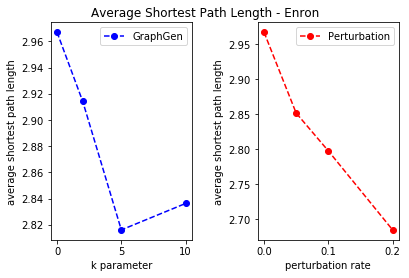

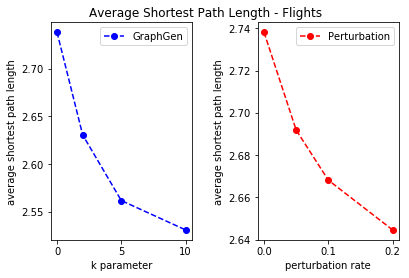

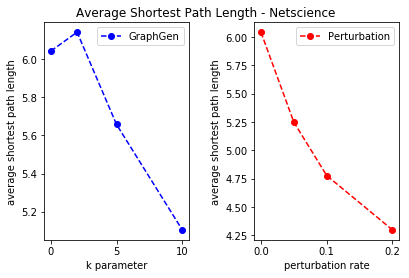

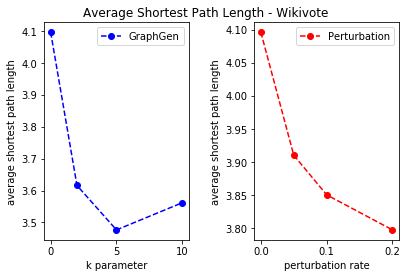

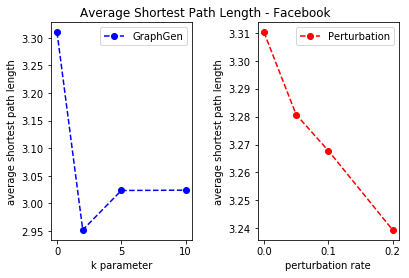

In [51]:
# Manually create plots for chosen properties

for graph in graph_names:
    prop = ['avg_shortest_path_length'] # set property here
    gen_df = get_mask(df, dataset=graph)
    gen_df = gen_df.sort_values(['k'])
    pert_df = get_mask_pert(df_pert, dataset=graph)
    pert_df = pert_df.sort_values(['p'])
    fig, axs = plt.subplots(1,2)
    fig.suptitle("Average Shortest Path Length - " + graph) # set nice looking name of the plot here
    axs[0].plot(gen_df["k"], gen_df[prop],'--bo', label="GraphGen")
    axs[0].set(xlabel = "k parameter")
    axs[0].set(ylabel = "average shortest path length")
    axs[0].legend()             
    axs[1].plot(pert_df["p"], pert_df[prop], '--ro',label="Perturbation")
    axs[1].set(xlabel = "perturbation rate")
    axs[1].set(ylabel = "average shortest path length")
    axs[1].legend()
    fig.tight_layout(pad = 1.8)
    plt.savefig("/home/cruder/PycharmProjects/SNACS/Figures/" + graph + "-" + prop[0]) # save to file

### Perturbation

In [11]:
def perturbation(graph, p):
    g = graph.copy()
    edges_to_remove = int(len(g.edges()) * p)
    
    removed_edges = []
    for i in range(edges_to_remove):
        random_edge = choice(list(g.edges()))
        g.remove_edges_from([random_edge])
        removed_edges.append(random_edge)

    while(edges_to_remove > 0):
        first_node = choice(list(g.nodes()))
        second_node = choice(list(g.nodes()))
        if(second_node == first_node):
            continue
        if g.has_edge(first_node, second_node) or (first_node, second_node) in removed_edges or (second_node, first_node) in removed_edges:
            continue
        else:
            g.add_edge(first_node, second_node)
            edges_to_remove -= 1
    
    return g

In [217]:
df_pert = pd.DataFrame(columns = ['graphnames','nodes', 'edges', 'components', 'avg_cc' , 'diameter','closeness', 'betweenness', 'max_degree'])

In [211]:
# Load previous data
df_pert = pd.read_csv('perturbation_results_final')

In [213]:
pert_rate = [0, 0.05, 0.1, 0.2]

In [342]:
# Perturbation graphs measurements
def pert_mainloop(dataframe, graphs):
    for index, graph in enumerate(graphs):
        for p in pert_rate:
            pert_graph = perturbation(graph, p)
            pert_measures = get_measurements(pert_graph)
            pert_measures = pert_measures.rename((str(graph_names[index]))+str(p))
            dataframe["graphnames"].append((str(graph_names[index]))+str(p))
            dataframe = dataframe.append(pert_measures)
    return dataframe

In [221]:
df_pert = pert_mainloop(df_pert, graphs)

In [17]:
df_pert = pd.read_csv("Perturbation Final Results", index_col = 0)

In [18]:
df_pert

,graphnames,nodes,edges,components,avg_cc,diameter,closeness,betweenness,max_degree,avg_shortest_path_length
0,Enron0,143.0,623.0,1.0,0.433907,8.0,0.350617,0.003749,42.0,2.967005
1,Enron0.05,143.0,623.0,1.0,0.378396,6.0,0.361323,0.004457,40.0,2.851472
2,Enron0.1,143.0,623.0,1.0,0.320484,8.0,0.365979,0.006683,39.0,2.797498
3,Enron0.2,143.0,623.0,1.0,0.250082,6.0,0.378667,0.007472,33.0,2.684625
4,Flights0,332.0,2126.0,1.0,0.625217,6.0,0.364137,0.000010,139.0,2.738125
5,Flights0.05,332.0,2126.0,3.0,0.508439,6.0,0.364969,0.000277,132.0,2.691843
6,Flights0.1,332.0,2126.0,3.0,0.407460,6.0,0.368880,0.000531,121.0,2.668131
7,Flights0.2,332.0,2126.0,2.0,0.278124,5.0,0.372597,0.001064,110.0,2.644591
8,Netscience0,379.0,914.0,1.0,0.741231,17.0,0.171351,0.000000,34.0,6.041867
9,Netscience0.05,379.0,914.0,3.0,0.612554,13.0,0.193487,0.000257,31.0,5.248158


In [93]:
import anonymity
from random import choice

In [94]:
def nodes_cand_dist(graph = pert_graph, query = 1):
    dist = []
    for i in [anonymity.deanonymize_h(pert_graph, i) for i in range(0, 5)][query]:
        dist.append([i][0])
    return dist      

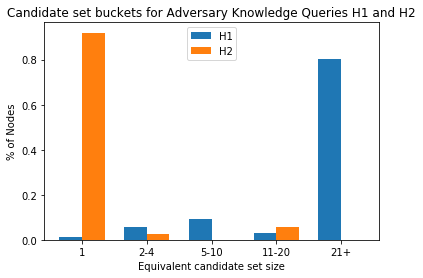

In [92]:
# Plot candidate set distribution

labels = ['1', '2-4', '5-10', '11-20', '21+']

sizes = nodes_cand_dist(pert_graph, query=1)
sizes2 = nodes_cand_dist(pert_graph, query=2)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sizes, width, label='H1')
rects2 = ax.bar(x + width/2, sizes2, width, label='H2')

ax.set_ylabel('% of Nodes')
ax.set_xlabel("Equivalent candidate set size")
ax.set_title('Candidate set buckets for Adversary Knowledge Queries H1 and H2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("Enronbucket")